In [424]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [426]:
#1a
#Reading 'spotifyFeatures' file and printting the file to know the number of samples and features
df = pd.read_csv('spotifyFeatures.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [427]:
#Retrieving samples belonging to the two genres and creating labels for the samples
filtered_songs = songs[songs['genre'].isin(['Pop','Classical'])]
filtered_songs.loc[filtered_songs['genre'] == 'Pop', 'label'] = 1
filtered_songs.loc[filtered_songs['genre'] == 'Classical', 'label'] = 0

#to know how many samples are from each genre
filtered_songs['label'].value_counts()

C:\Users\cinis\AppData\Local\Temp\ipykernel_32544\2701397290.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_songs.loc[filtered_songs['genre'] == 'Pop', 'label'] = 1


label
1.0    9386
0.0    9256
Name: count, dtype: int64

In [429]:
#separating the two classes by using two features, namely 'liveness' and 'loudness'
liveness_loudness = filtered_songs[["liveness", "loudness"]]

In [432]:
#1c#
#making the matrix with songs along the rows and songs features around the columns
songs_array = np.array(filtered_songs[['liveness', 'loudness']])
print(songs_array)

[[  0.0762 -21.356 ]
 [  0.106  -34.255 ]
 [  0.0916 -28.215 ]
 ...
 [  0.0816 -25.843 ]
 [  0.105  -20.238 ]
 [  0.0953 -29.223 ]]


In [434]:
#making a nunmpy array with the songs genre
genre_songs = np.array(filtered_songs['label'])
print(genre_songs)

[0. 0. 0. ... 0. 0. 0.]


In [436]:
#Splitting the dataset into the training set and testing set
label = filtered_songs['label'].to_numpy()
features = filtered_songs[['liveness', 'loudness']].to_numpy()  
#Separate the data by class
pop_songs = np.where(labels == 1)[0]  
classical_songs = np.where(labels == 0)[0]  

#Splitting each class into training and test sets
def split(songs, split_ratio):
    np.random.shuffle(songs)  
    split_index = int(len(songs) * split_ratio)
    return songs[:split_index], songs[split_index:]

#80% training and 20% test
train_pop_songs, test_pop_songs = split(pop_songs, 0.8)
train_classical_songs, test_classical_songs = split(classical_songs, 0.8)

#bringing together pop and classic songs to create training and test sets
train_songs = np.concatenate((train_pop_songs, train_classical_songs))
test_songs = np.concatenate((test_pop_songs, test_classical_songs))

# Create training and test datasets
songs_train = features[train_songs]
genre_train = labels[train_songs]
songs_test = features[test_songs]
genre_test = labels[test_songs]

# Print the sizes of the sets
print(f'Training set size: {len(songs_train)}')
print(f'Test set size: {len(songs_test)}')
print(f'Test set size: {len(songs_array)}')

Training set size: 14912
Test set size: 3730
Test set size: 18642


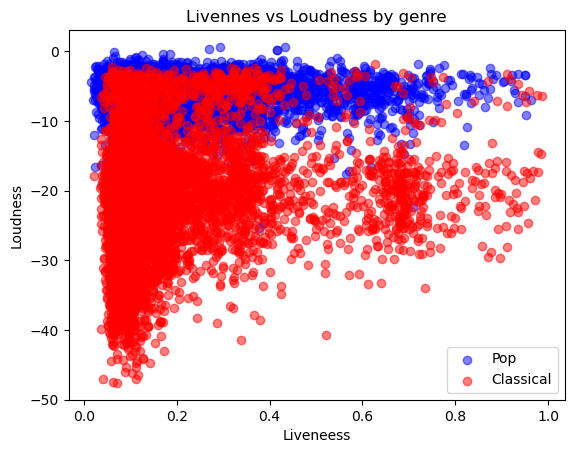

In [438]:
#1d
#plotting the samples on the liveness vs loudness plane
plt.scatter(filtered_songs[filtered_songs['label'] == 1]['liveness'],
            filtered_songs[filtered_songs['label'] == 1]['loudness'],
            color='blue', label='Pop', alpha=0.5)
plt.scatter(filtered_songs[filtered_songs['label'] == 0]['liveness'],
            filtered_songs[filtered_songs['label'] == 0]['loudness'],
            color='red', label='Classical', alpha=0.5)

plt.xlabel('Liveneess')
plt.ylabel('Loudness')
plt.title('Livennes vs Loudness by genre')
plt.legend()

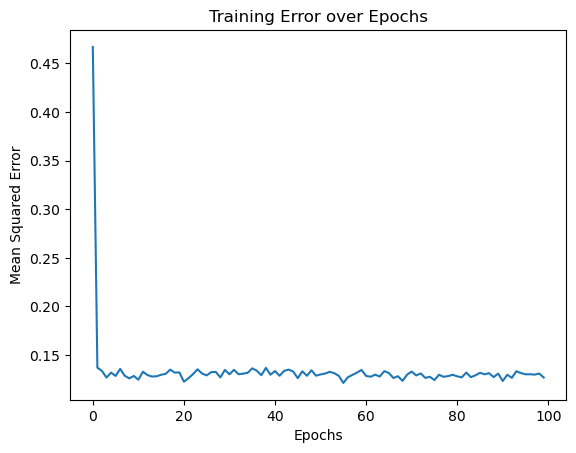

0.8664250268240343

In [439]:
#2a
# Initialize weights, bias, learning rate, epochs, errors and TP, TN, FP, FN for calculating the accuracy
weights = np.zeros(2)
bias = 0
learning_rate = 0.01
epochs = 100
errors = []
TP = 0
TN = 0
FP = 0
FN = 0

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(len(songs_train)):
        # Selecting a random index
        rand_index = np.random.randint(len(songs_train))
        x = songs_train[rand_index]
        label = genre_train[rand_index]

        # Prediction using the logistic function
        pred = (1 / (1 + np.exp(-(np.dot(x, weights) + bias)))).astype(int)

        # Calculate the error
        error = label - pred

        # Update weights and bias using stochastic gradient descendent
        weights += learning_rate * error * x
        bias += learning_rate * error

        # Accumulate error
        total_error += error**2

        #accuracy
        if label== 1 and pred==1:
            TP = TP + 1
        if label== 0 and pred== 0:
            TN = TN + 1
        if label== 0  and pred== 1:
            FP = FP + 1
        if label== 1 and pred== 0:
            FN = FN + 1
    # Store mean squared error for plotting
    errors.append(total_error / len(songs_train))

# Plot the training error over epochs
plt.plot(errors)
plt.title('Training Error over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

#accuracy
accuracy = (TP+TN)/(FP+FN+TP+TN)
accuracy

In [440]:
#2b
# test_logistic_regression logic
test_pred =  (1 / (1 + np.exp(-(np.dot(songs_test, weights) + bias)))).astype(int)
#accuracy
FN = 0
TN = 0
FP = 0
TP = 0

for i in range(len(songs_test)):
  if genre_test[i]== 1 and test_pred[i]==1:
    TP = TP + 1
  if genre_test[i]== 0 and test_pred[i]== 0:
    TN = TN + 1
  if genre_test[i]== 0  and test_pred[i]== 1:
    FP = FP + 1
  if genre_test[i]== 1 and test_pred[i]== 0:
    FN = FN + 1
accuracy = (TP+TN)/(FP+FN+TP+TN)

TP, FP, TN, FN, test_pred, genre_test, accuracy



(1392,
 128,
 1724,
 486,
 array([1, 1, 0, ..., 0, 0, 0]),
 array([1., 1., 1., ..., 0., 0., 0.]),
 0.8353887399463807)

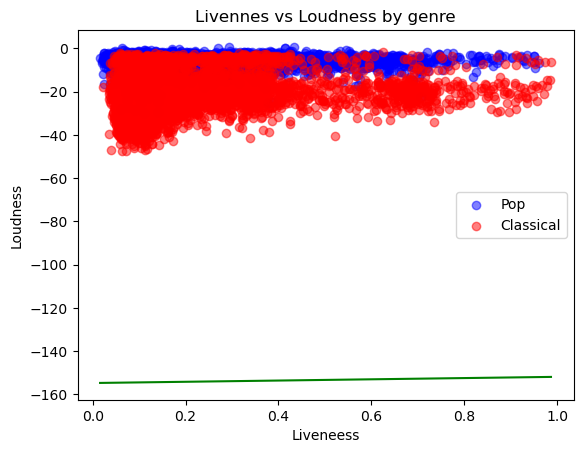

In [441]:
#2c
#to plot again the samples in the liveness vs loudness plane
plt.scatter(filtered_songs[filtered_songs['label'] == 1]['liveness'],
            filtered_songs[filtered_songs['label'] == 1]['loudness'],
            color='blue', label='Pop', alpha=0.5)
plt.scatter(filtered_songs[filtered_songs['label'] == 0]['liveness'],
            filtered_songs[filtered_songs['label'] == 0]['loudness'],
            color='red', label='Classical', alpha=0.5)

plt.xlabel('Liveneess')
plt.ylabel('Loudness')
plt.title('Livennes vs Loudness by genre')

#linear line separating the data using the extract parameters from the logistic regression 
x = np.linspace(min(filtered_songs['liveness']), max(filtered_songs['liveness']))
y = (-bias-x*weights[0])/weights[1]

plt.plot(x, y, color='green')
plt.legend()
plt.show()

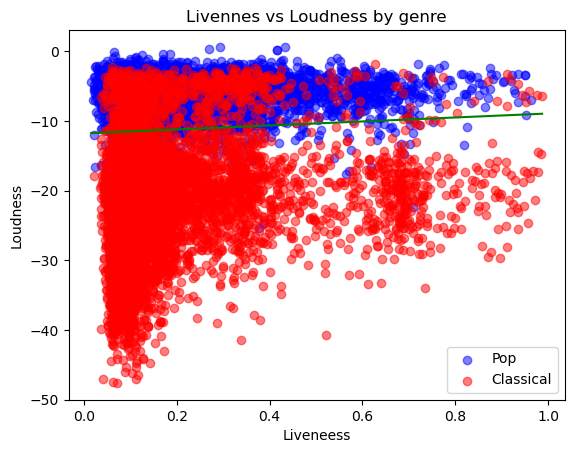

In [461]:
#how the graphic should be
plt.scatter(filtered_songs[filtered_songs['label'] == 1]['liveness'],
            filtered_songs[filtered_songs['label'] == 1]['loudness'],
            color='blue', label='Pop', alpha=0.5)
plt.scatter(filtered_songs[filtered_songs['label'] == 0]['liveness'],
            filtered_songs[filtered_songs['label'] == 0]['loudness'],
            color='red', label='Classical', alpha=0.5)

plt.xlabel('Liveneess')
plt.ylabel('Loudness')
plt.title('Livennes vs Loudness by genre')

x = np.linspace(min(filtered_songs['liveness']), max(filtered_songs['liveness']))
y = (-bias-x*weights[0])/weights[1]+143
plt.plot(x, y, color='green')

plt.legend()
plt.show()

In [443]:
#3a
#creating the confusion matrix using TP FP FN TN calculated before
ConfMat = np.zeros((2,2))
ConfMat[0][0] = TP
ConfMat[0][1] = FP
ConfMat[1][0] = FN
ConfMat[1][1] = TN

ConfMat

array([[1392.,  128.],
       [ 486., 1724.]])

In [444]:
#3c
#computing which songs are difficult to classify
prob =  1 / (1 + np.exp(-(np.dot(songs_array, weights) + bias)))
np.where(np.abs(prob-0.5)<0.1)

array([], dtype=int64)